# Exploratory Data Analysis

In this tutorial we focus on two popular methods for exploring high dimensional datasets. 

1. [Principal Component Analysis](https://en.wikipedia.org/wiki/Principal_component_analysis)
2. [Latent Semantic Analysis](https://en.wikipedia.org/wiki/Latent_semantic_analysis)

The first method is a general scheme for dimensionality reduction, but the second one is specifically used in the text domain. 


----------------------------------------------------------
## Principal Component Analysis (PCA)

PCA is a popular method for summarizing datasets. Suppose, we have a dataset of different [wine](http://archive.ics.uci.edu/ml/datasets/Wine) types. We describe each wine sample by its Alcohol content, color, and so on (see this very nice visualization of wine properties taken from here). Some of these features will measure related properties and so will be redundant. So, we can summarize each wine sample with fewer features! PCA is one such way to do this. It's also called as a method for dimensionality reduction.


Here we have a scatter plot of different wine samples (synthetic). It's based on two wine characteristics, wine darkness and alcohol content. 
<img src="http://i.stack.imgur.com/jPw90.png">
We notice a correlation between these two features. We can construct a new property or feature (that summarizes the two features) by drawing a line through the *center of the scatter plot* and *projecting* all points onto this line. We construct these lines via linear combinations of $x$ and $y$, i.e., $w_1 x + w_2 y$. Each configuration of these coefficients will give us a new line. 

Now we will look at the projections -- The below animation shows how the projections of data points look like for different lines (red dots are projections of the blue dots):
<img src="http://i.stack.imgur.com/Q7HIP.gif">

PCA aims to find **the best line** according to the following criteria. 

<img src="http://i.stack.imgur.com/XFngC.png">

1. The variation of (projected) values along the line should be maximal. Have look at how the "variance" of the red dots changes while the line rotates...

2. The line should give the lowest reconstruction error. By reconstruction, we mean that constructing the original two characteristics (position ($x$, $y$) of a blue dot) from the new one (position of a red dot). This reconstruction error is proportional to the length of the connecting red line. 

We will notice that **the maximum variance** and **the minimum error** are happened at the same time, when the line points to the magenta ticks. This line corresponds the first principal component constructed by PCA.  

Formally,  

1. The variance of the red dots is measured as the average squared distance from the center of datapoints to each red dot. 
2. The total reconstruction error is measured as the average squared length of corresponding redlines 
3. The redlines and the black lines are perpendicular. Thus, the sum of 1. and 2. is given by the Pythagoras theorem  

PCA [objective](http://stats.stackexchange.com/questions/10251): Given the covariance matrix $C$ of the data matrix $A$, we look for a vector $u$ having unit length, $\|u\| = 1$, such that $u^TCu$ is maximal. 

PCA is typically performed using **eigenvectors** and **eigenvalues** of the covariance matrix. We will look at the intuition behind this approach. An eigenvector of $C$ is by definition, any vector $u$ such that $C u = \lambda u$. 

For the dataset $A$ ($n \times 2$ matrix) above, the covariance matrix C ($2 \times 2$ matrix) is 

\begin{equation*}
\begin{vmatrix}
1.07 &  0.63 \\
0.63 &  0.64 
\end{vmatrix}
\end{equation*}

It's a square symmetric matrix. Thus, one can diagonalize it by choosing a new orthogonal coordinate system, given by its eigenvectors ([spectral theorem](https://en.wikipedia.org/wiki/Spectral_theorem)): 

\begin{equation*}
C = V \Lambda V^{T}
\end{equation*}

where $V$ is a matrix of eigenvectors (each column is an eigenvector) and $\Lambda$ is a diagonal matrix with eigenvalues 	$\lambda_i$ on the diagonal. 

In the new (eigen) space, the covariance matrix is diagonal, as follows: 

\begin{equation*}
\begin{vmatrix}
1.52 &  0 \\
0 &  0.18 
\end{vmatrix}
\end{equation*}

It means that there is no correlation between points in this new system. The maximum possible variance is $1.52$, i.e., the first eigenvalue. We achieve this variance by taking the projection on the first coordinate axis. The direction of this axis is given by the first eigen vector of $C$.


This example/discussion is adapted from [here](http://stats.stackexchange.com/questions/2691). 

-------------------------------

### PCA on a Real Dataset

For illustration, we will use the popular [wine](http://archive.ics.uci.edu/ml/datasets/Wine) dataset. Each wine sample is described by 14 features as follows: 


In [1]:
f = open("wine.headers")
print(f.read())

Class
Alcohol
Malic-acid
Ash
Alcalinity-of-ash
Magnesium
Total-phenols
Flavanoids
Nonflavanoid-phenols
Proanthocyanins
Color-intensity
Hue
OD280-OD315-of-diluted-wines
Proline



Let's first look at two wine characteristics: **Alcohol Content** and **Color Intensity**. 

<img src="http://winefolly.com/wp-content/uploads/2013/02/wine-color-chart1.jpg">

We can draw a scatter plot:  

In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg as la

wine_class, wine_alc, wine_col = np.loadtxt("wine.data", delimiter=',', usecols=(0, 1, 10), unpack=True, skiprows=1)

# print wine_class


In [3]:
# print wine_alc
# print wine_col

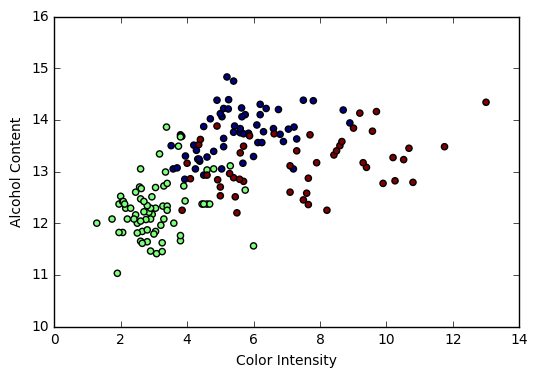

In [4]:
plt.scatter(wine_col, wine_alc, c=wine_class)
plt.xlabel("Color Intensity")
plt.ylabel("Alcohol Content")

### PCA on a Subset of the Wine Data

In [5]:

col_alc = np.matrix([wine_col, wine_alc]).T
m, n = col_alc.shape

# print m, n
# print col_alc.mean(axis=0)

# center the data with column means 
column_means = col_alc.mean(axis=0)
col_alc -= column_means

# calculate the covariance matrix
col_alc_cov = np.cov(col_alc, rowvar=False)

# calculate eigenvectors & eigenvalues of the covariance matrix
evals, evecs = la.eigh(col_alc_cov)

# sort eigenvalues and eigenvectors in decreasing order
idx = np.argsort(evals)[::-1]
evecs = evecs[:,idx]
evals = evals[idx]

print evecs, evals 


[[-0.97893176  0.20418769]
 [-0.20418769 -0.97893176]] [ 5.58893076  0.44458095]


Let's visualize the normalized data and principal components.  

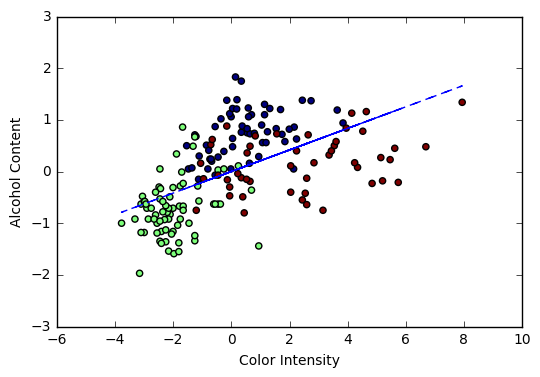

In [6]:

plt.scatter(col_alc[:,0], col_alc[:,1], c=wine_class)
plt.xlabel("Color Intensity")
plt.ylabel("Alcohol Content")
plt.plot(col_alc[:,0], (evecs[1][0]/evecs[0][0]) * col_alc[:,0], c="blue", linestyle='--') # first eigen vector 


Let's transform the normalized data to the principal component space

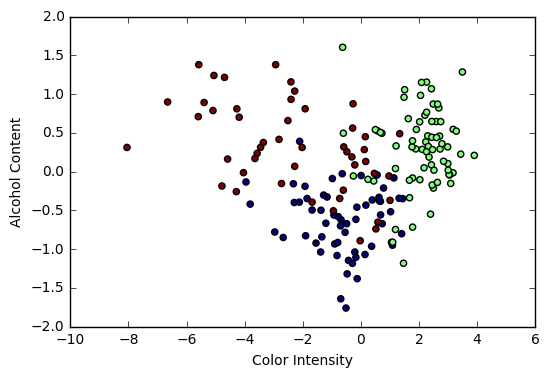

In [7]:

pca_data = np.dot(evecs.T, col_alc.T).T

# plot the data points in the new space   
plt.scatter(pca_data[:,0], pca_data[:,1], c=wine_class)
plt.xlabel("Color Intensity")
plt.ylabel("Alcohol Content") 



**Homework $1$**: Apply PCA on the whole set of features and analyze its principal components.   


------------------------------------------------------

## Exploratory Text Analysis

First, let's import numpy and a couple other modules we'll need.

In [8]:

import numpy as np 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from scipy.spatial.distance import cosine




We consider a toy document collection (corpus) and a query for this tutorial. 

In [9]:

corpus = [
    "Romeo and Juliet.", # document 1 
    "Juliet: O happy dagger!", # document 2
    "Romeo died by dagger.", # document 3
    "'Live free or die', that's the New-Hampshire's motto.", # document 4
    "Did you know, New-Hampshire is in New-England." # document 5
]


key_words = [
    'die', 
    'dagger'
]




We now build a *term frequency* (**TF**) matrix from the corpus using the Python **sklearn** package.  

In [10]:
vectorizer = CountVectorizer(min_df=0, stop_words=None, strip_accents='ascii')

docs_tf = vectorizer.fit_transform(corpus)
vocabulary_terms = vectorizer.get_feature_names()

print ' '.join(vocabulary_terms)

and by dagger did die died england free hampshire happy in is juliet know live motto new or romeo that the you


Let's look at the corpus **vocabulary** terms. 

Some of these terms are noninformative or [stopwords](http://nlp.stanford.edu/IR-book/html/htmledition/dropping-common-terms-stop-words-1.html), e.g., a, an, the, and, etc. One can use a standard or a custom stopword list to remove these terms.  

The vocabulary also contains different forms for a single word, e.g., die, died. One can use methods such are [stemming and lemmatization](http://nlp.stanford.edu/IR-book/html/htmledition/stemming-and-lemmatization-1.html) to get root forms of words in a corpus. 

There are several open source libraries available to perform all these for you, e.g., [Python Natural Language Processing Toolkit](http://www.nltk.org/) (NLTK)


In [11]:
# A custom stopword list 
stop_words = ["a", "an", "the", "and", "in", "by", "or", "did", "you", "is", "that"]

# Here, we assume that we preprocessed the corpus  
preprocessed_corpus = [
"Romeo and Juliet",
"Juliet O happy dagger",
"Romeo die by dagger",
"Live free or die that the NewHampshire motto",
"Did you know NewHampshire is in NewEngland"
]

# vectorizer = CountVectorizer(min_df=0, stop_words=stop_words) # uses the stopwords list 
vectorizer = CountVectorizer(min_df=0, stop_words=None) # includes all stopwords 

docs_tf = vectorizer.fit_transform(preprocessed_corpus)
vocabulary_terms = vectorizer.get_feature_names()


print ' '.join(vocabulary_terms)

and by dagger did die free happy in is juliet know live motto newengland newhampshire or romeo that the you


---------------
### TF-IDF

Here, we compute the TF-IDF matrix for the normalized corpus and the sample query **die dagger**. We consider the query as a document in the corpus.  

In [12]:
key_words = ['die', 'dagger']

# To keep the development simple, we build a composite model for both the corpus and the query 
docs_query_tf = vectorizer.transform(preprocessed_corpus + [' '.join(key_words)]) 

transformer = TfidfTransformer(smooth_idf = False)
tfidf = transformer.fit_transform(docs_query_tf.toarray())

# D x V document-term matrix 
tfidf_matrix = tfidf.toarray()[:-1] 

# 1 x V query-term vector 
query_tfidf = tfidf.toarray()[-1] 

print tfidf_matrix
print query_tfidf
    

[[ 0.68516361  0.          0.          0.          0.          0.          0.
   0.          0.          0.51504894  0.          0.          0.          0.
   0.          0.          0.51504894  0.          0.          0.        ]
 [ 0.          0.          0.43622688  0.          0.          0.
   0.71927623  0.          0.          0.54069197  0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.65927804  0.39983916  0.          0.39983916  0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.49559033  0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.23033469  0.37978923
   0.          0.          0.          0.          0.          0.37978923
   0.37978923  0.          0.28549392  0.37978923  0.          0.37978923
   0.37978923  0.        ]
 [ 0.          0.          0.          0.39028338  0.     

### Information Retrieval via TF-IDF 

Now, we solve the document ranking problem for the given query: ***die dagger***. We use [cosine distance](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.cosine.html#scipy.spatial.distance.cosine) to measure similarity between each document vector and the query vector in the TF-IDF vector space. Once we have the distance scores we can sort them to get a rank list as follows.     

In [13]:

query_doc_tfidf_cos_dist = [cosine(query_tfidf, doc_tfidf) for doc_tfidf in tfidf_matrix]
query_doc_tfidf_sort_index = np.argsort(np.array(query_doc_tfidf_cos_dist))

for rank, sort_index in enumerate(query_doc_tfidf_sort_index):
    print rank, query_doc_tfidf_cos_dist[sort_index], corpus[sort_index]
    
    
    

0 0.434542044158 Romeo died by dagger.
1 0.69154101474 Juliet: O happy dagger!
2 0.837128775958 'Live free or die', that's the New-Hampshire's motto.
3 1.0 Romeo and Juliet.
4 1.0 Did you know, New-Hampshire is in New-England.


--------------------------------------------
### Latent Semantic Analysis (LSA)

We perform LSA using the well-known matrix factorization technique Singular Value Decomposition (SVD). 

We consider the TF matrix for SVD. In practice, one can also perform SVD on the TF-IDF matrix.    

In [14]:
tf_matrix = docs_tf.toarray() # D x V matrix 
A = tf_matrix.T 

U, s, V = np.linalg.svd(A, full_matrices=1, compute_uv=1)


Note that 

* $A$ is a $V \times D$ data matrix 

* $U$ is the matrix of the eigenvectors of $C = AA'$ (the term-term matrix). It's a $V \times V$ matrix. 

* $V$ is the matrix of the eigenvectors of $B = A'A$ (the document-document matrix). It's a $D \times D$ matrix 

* $s$ is the vector singular values, obtained as square roots of the eigenvalues of $B$.

More info can be found in the python SVD documentation: https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.svd.html

We now perform data reduction or transform documents in a $V$-dimensional space to a lower dimensional space. Let's take the number dimensions $K = 3$, i.e., the number of semantic components in the corpus. 

Using LSA, we can represent vocabulary terms in the semantic space.   


In [15]:
K = 2 # number of components

A_reduced = np.dot(U[:,:K], np.dot(np.diag(s[:K]), V[:K, :])) # D x V matrix 

docs_rep = np.dot(np.diag(s[:K]), V[:K, :]).T # D x K matrix 
terms_rep = np.dot(U[:,:K], np.diag(s[:K])) # V x K matrix 

print A_reduced
print docs_rep
print terms_rep


[[ 0.01101144  0.01101144  0.03149126  0.07534314 -0.06403627]
 [ 0.03149126  0.03149126  0.09736601  0.26882755 -0.11676566]
 [ 0.04250269  0.04250269  0.12885727  0.34417069 -0.18080193]
 [-0.06403627 -0.06403627 -0.11676566  0.04660311  0.97538684]
 [ 0.1068344   0.1068344   0.36619357  1.17405184 -0.07016255]
 [ 0.07534314  0.07534314  0.26882755  0.90522428  0.04660311]
 [ 0.01101144  0.01101144  0.03149126  0.07534314 -0.06403627]
 [-0.06403627 -0.06403627 -0.11676566  0.04660311  0.97538684]
 [-0.06403627 -0.06403627 -0.11676566  0.04660311  0.97538684]
 [ 0.02202287  0.02202287  0.06298251  0.15068628 -0.12807253]
 [-0.06403627 -0.06403627 -0.11676566  0.04660311  0.97538684]
 [ 0.07534314  0.07534314  0.26882755  0.90522428  0.04660311]
 [ 0.07534314  0.07534314  0.26882755  0.90522428  0.04660311]
 [-0.06403627 -0.06403627 -0.11676566  0.04660311  0.97538684]
 [ 0.01130687  0.01130687  0.15206189  0.95182739  1.02198994]
 [ 0.07534314  0.07534314  0.26882755  0.90522428  0.04

### Information Retrieval via LSA

Now we would like to represent the query in the LSA space. A natural choice is to compute a vector that is the centroid of the semantic vectors for its terms. 

In our example, the keyword query is **die dagger**. We compute the query vector as        

In [16]:

key_word_indices = [vocabulary_terms.index(key_word) for key_word in key_words] # vocabulary indices 

key_words_rep = terms_rep[key_word_indices,:]     
query_rep = np.sum(key_words_rep, axis = 0)

print query_rep



[ 1.28630599 -1.0015379 ]


We now solve the document ranking problem given the query **die dagger** as follows.  

In [17]:
query_doc_cos_dist = [cosine(query_rep, doc_rep) for doc_rep in docs_rep]
query_doc_sort_index = np.argsort(np.array(query_doc_cos_dist))

for rank, sort_index in enumerate(query_doc_sort_index):
    print rank, query_doc_cos_dist[sort_index], corpus[sort_index]
    


0 0.0124767581262 Romeo died by dagger.
1 0.0342469292979 'Live free or die', that's the New-Hampshire's motto.
2 0.100929668629 Romeo and Juliet.
3 0.100929668629 Juliet: O happy dagger!
4 1.09064729229 Did you know, New-Hampshire is in New-England.


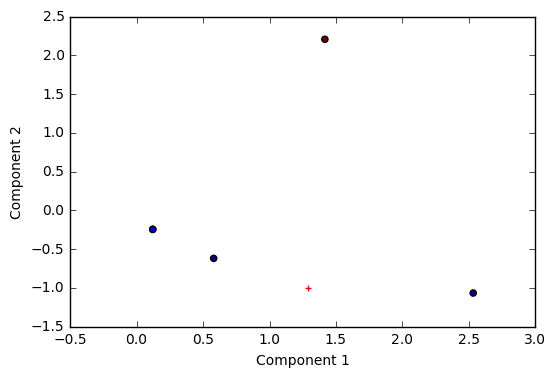

In [18]:
# plot documents in the new space  

plt.scatter(docs_rep[:,0], docs_rep[:,1], c=query_doc_cos_dist) # all documents 
plt.scatter(query_rep[0], query_rep[1], marker='+', c='red') # the query 
plt.xlabel("Component 1")
plt.ylabel("Component 2")

**Homework $2$**: Compare the ranking scores of documents in this list with the ranking scores generated by TF-IDF scheme that we discussed above. 